# Project : Seattle AirBnB

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Initial Insights 

Before diving deep into data, let's find out some general information on how the reservation price is determined and search for some useful facts for the future analysis.

**AirBnB reservation price is based on following costs (according to [AirBnB official website information](https://www.airbnb.co.in/help/article/125/how-is-the-price-determined-for-my-reservation?locale=en&_set_bev_on_new_domain=1593369098_ODJmM2Y0YjZlNjhl)):**

- **Costs determined by the host:**
  - **Nightly price:** Nightly rate decided by the host;
  - **Cleaning fee:** One-time fee charged by some hosts to cover the cost of cleaning their space;
  - **Extra guest fee:** Fee charged by some hosts for each guest beyond a set number;
- **Costs determined by Airbnb:** Airbnb service fee;
- **Other costs that may be included:** currency exchange fees, VAT, other local taxes etc

In our analysis we will concentrate on the factors, which influence the nightly price, determined by the host. Actually, AirBnB already has an algorithm, which suggests hosts the price. The approach for the algorithm and challenges are described in the article [here](https://www.vrmintel.com/inside-airbnbs-algorithm/). We can also use the information from the article in our analysis.

- Time of the year, when reservation is made, affects the price;
- Amenities offered like Wi-Fi and TV should be considered in the analysis, as they also might have great influence on price;
- It is better to use neighbourhood information rather then exact coordinates to describe the listing location, because sometimes even close locations might have huge difference in listing prices, if they belong to different neighbourhoods or are located different sides of the river.

# Motivation

- What is the seasonal pattern of Airbnb in Seattle?
- What are the busiest times of the year to visit Seattle? 
- How does rental pricing increase or decrease by season and what is the peak season in Seattle?
- What is the most expensive weekday and month ?
- How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?
- What are the most influential features about the rental price?

## The First look at the data

Fortunately, we can try to answer these questions by analysing publicly accessible __[AirBnB](https://www.airbnb.com)__ data, available on __[Inside AirBnB](http://insideairbnb.com/get-the-data.html)__ and on __[Kaggle](https://www.kaggle.com/airbnb/seattle)__.

AirBnB provided us with 3 datasets for Seattle:

- **listings.csv** - summary information on listing in Seattle such as: location, host information, cleaning and guest fees, amenities etc.
- **calendar.csv** - calendar data for the listings: availability dates, price for each date.
- **reviews.csv** - summary review data for the listings.

In [2]:
pd.set_option('display.max_columns',400)

In [3]:
# Load datasets
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

# Calendar Dataset

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar.shape

(1393570, 4)

In [6]:
# missing values
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [8]:
# change the datatype of 'price' column
calendar['price'] = calendar['price'].str.extract('([0-9]+\.[0-9]+)').astype(float)

In [9]:
# change the datatype of 'date' column
calendar['date'] = pd.to_datetime(calendar['date'])

In [10]:
# extract the year,month and weekday from 'date' column
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month
calendar['weekday'] = calendar['date'].dt.weekday

In [11]:
# mapping 't' to 1 and 'f' to 0 in the 'available' column
calendar['available'] = calendar['available'].map({'t': 1, 'f' : 0 })

In [12]:
# occupancy = 1 - availability
calendar['occupancy'] = 1 - calendar['available']

In [13]:
calendar.sample(5)

,listing_id,date,available,price,year,month,weekday,occupancy
435228,9961538,2016-05-31,0,NaN,2016,5,1,1
62708,7731836,2016-10-23,0,NaN,2016,10,6,1
1380393,9196007,2016-11-27,0,NaN,2016,11,6,1
316424,4539948,2016-12-03,0,NaN,2016,12,5,1
868364,2652941,2016-02-02,1,95.0,2016,2,1,0


## Seasonal Booking

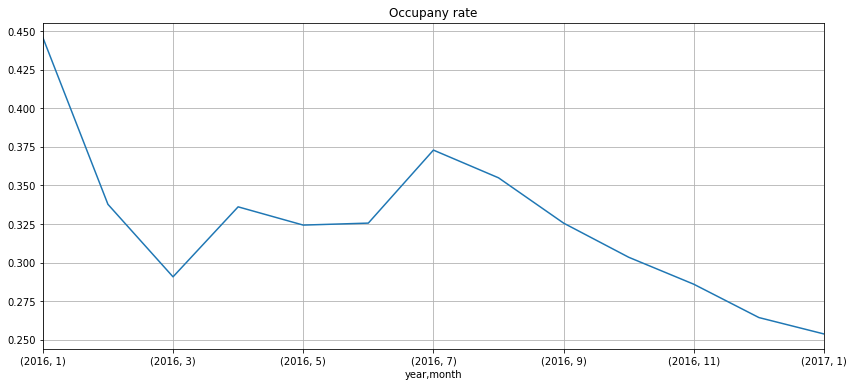

In [14]:
plt.figure(figsize = (14,6))
plt.title('Occupany rate')
calendar.groupby(['year','month'])['occupancy'].mean().plot(grid = True)

The highest occupancy rate is in January 2016, and decreasing rapidly from 50% to 30% in 2 months. Then, it goes up slightly in the start of April and in the start of July separately. After that, it declines continuously.

It seems that spring and summer are the busy season. The best weather in Seattle is from late June to early September. And, in fact, there is a peak during that time.

However, it is weird to see the highest occupancy rate is in January 2016. It might be because any festivals. Or did the hotels change their price strategy to become more competitive? I don't know why.

This tells us that summer and winter holidays should be the busiest times to visit Seattle.

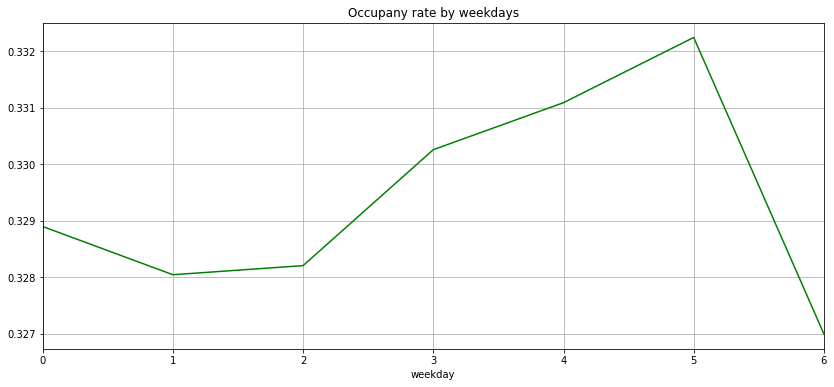

In [15]:
# The day of the week with Monday=0, Sunday=6
plt.figure(figsize = (14,6))
plt.title('Occupany rate by weekdays')
calendar.groupby('weekday')['occupancy'].mean().plot(color = 'g', grid = True)

Saturday is the most occupied day of the week

## Seasonal Rental Price

In [16]:
calendar.groupby('month')['price'].mean().sort_values()

month
1     122.527188
2     123.898406
3     127.905847
4     134.334219
11    134.955062
10    136.279859
12    136.424829
5     138.762902
9     142.349753
6     146.696378
8     149.687335
7     151.245345
Name: price, dtype: float64

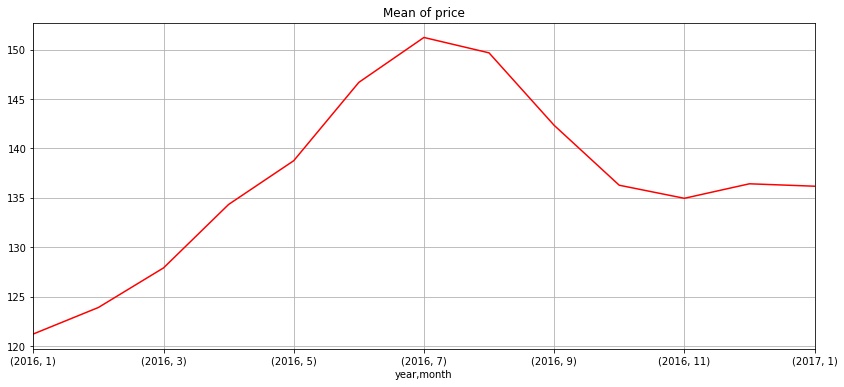

In [17]:
plt.figure(figsize = (14,6))
plt.title('Mean of price')
calendar.groupby(['year','month'])['price'].mean().plot(color = 'r', grid = True)

Obviously, the rental price are higher from May to September. In that time, Seattle usually have nice weather. It makes sense that rental price in Rainy Day is cheaper.

In addition, the cheapest price is in in January 2016. It could be a reason for high occupancy.


In [18]:
calendar.groupby('weekday')['price'].mean().sort_values()

weekday
1    134.666674
2    134.705612
0    134.940037
3    135.723971
6    135.726490
4    142.283299
5    142.440297
Name: price, dtype: float64

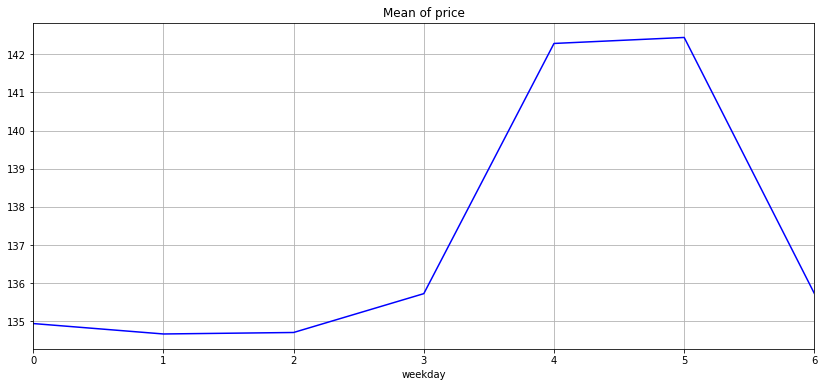

In [19]:
plt.figure(figsize = (14,6))
plt.title('Mean of price')
calendar.groupby('weekday')['price'].mean().plot(color = 'b', grid = True)

It turns out that Saturday is the most expensive weekday with mean \\$142.44 whereas July is the most expensive month with mean of $151.24 

# listings dataset

In [20]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [21]:
listings.shape

(3818, 92)

In [22]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [23]:
print("No. of listings :" ,listings['id'].nunique())
print(" No. of host :" , listings['host_id'].nunique())

No. of listings : 3818
 No. of host : 2751


In [24]:
# drop some irrelevent columns
irrelevent_cols = ['listing_url','scrape_id','last_scraped','name','name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url','host_id','host_url', 'host_name', 'host_since',
       'host_location', 'host_about','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed','city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact','bed_type','weekly_price', 'monthly_price','security_deposit','cleaning_fee',
                   'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review',
        'review_scores_cleanliness','square_feet',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

In [25]:
listings.drop(irrelevent_cols, axis = 1 , inplace = True)

In [26]:
listings.sample(3)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy
214,3401644,within a few hours,100%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$150.00,5,88.0,10.0
261,5580457,within a few hours,100%,100%,f,Queen Anne,Apartment,Entire home/apt,2,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$150.00,16,93.0,10.0
92,4118282,within a few hours,100%,100%,f,Ballard,House,Entire home/apt,5,1.5,2.0,2.0,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",$80.00,88,95.0,10.0


In [27]:
listings.shape

(3818, 17)

In [28]:
listings.dtypes

id                                int64
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
dtype: object

In [29]:
# change the datatype of 'price'
listings['price'] = listings['price'].str.extract('([0-9]+\.[0-9]+)').astype(float)

In [30]:
listings['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [31]:
# No. of missing values
listings.isnull().sum()

id                                0
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
amenities                         0
price                             0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
dtype: int64

### Price depending on Neighbourhood

In [32]:
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

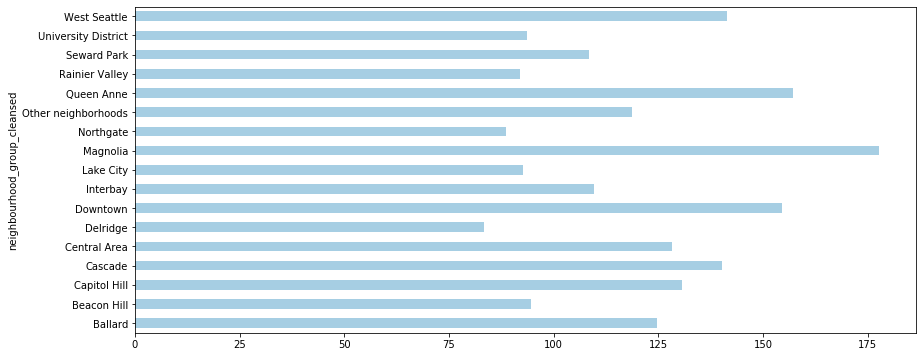

In [33]:
plt.figure(figsize = (14,6))
listings.groupby(['neighbourhood_group_cleansed'])['price'].mean().plot(kind = 'barh', colormap='Paired' )

On the diagram above we can see that prices differ depending on the location (neighbourhood). The highest average prices are in Mangnolia . Downtown and Queen Anne have also higher average price.

### Explore categorial feature - host_response_time

In [34]:
listings['host_response_time'].value_counts(dropna = False)

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64

Text(0.5, 1.0, 'Host Responses Time')

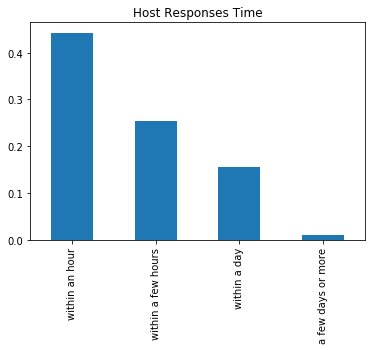

In [35]:
(listings['host_response_time'].value_counts()/listings.shape[0]).plot(kind = "bar");
plt.title('Host Responses Time')

It looks like a good percentage of hosts respond within an hour and it's a downward trend from there.

### Explore Categorial feature - property_type 

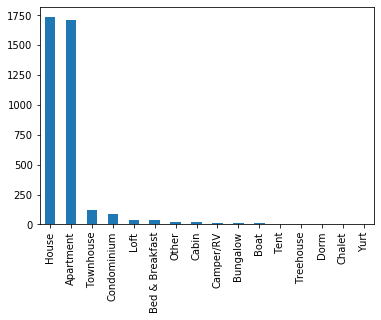

In [36]:
listings['property_type'].value_counts().plot(kind = 'bar')

It's good to know that apartments and houses dominate the listings data set. We can focus on these if needed for any of our analysis.

### Handle amenities column

In [37]:
listings['amenities'][0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [38]:
listings['amenities'] = listings['amenities'].str.replace('{','').str.replace('}','').str.replace('"','').str.split(',')

In [39]:
listings['amenities'][0]

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [40]:
type(listings['amenities'].sum())

list

In [41]:
amenities =pd.Series(listings['amenities'].sum())

In [42]:
print(amenities.unique())
print(amenities.nunique())

['TV' 'Cable TV' 'Internet' 'Wireless Internet' 'Air Conditioning'
 'Kitchen' 'Heating' 'Family/Kid Friendly' 'Washer' 'Dryer'
 'Free Parking on Premises' 'Buzzer/Wireless Intercom' 'Smoke Detector'
 'Carbon Monoxide Detector' 'First Aid Kit' 'Safety Card'
 'Fire Extinguisher' 'Essentials' 'Pets Allowed'
 'Pets live on this property' 'Dog(s)' 'Cat(s)' 'Hot Tub'
 'Indoor Fireplace' 'Shampoo' 'Breakfast' '24-Hour Check-in' 'Hangers'
 'Hair Dryer' 'Iron' 'Laptop Friendly Workspace' 'Suitable for Events'
 'Elevator in Building' 'Lock on Bedroom Door' 'Wheelchair Accessible'
 'Gym' '' 'Pool' 'Smoking Allowed' 'Other pet(s)' 'Doorman'
 'Washer / Dryer']
42


In [43]:
amenities.value_counts()

Wireless Internet             3667
Heating                       3627
Kitchen                       3423
Smoke Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon Monoxide Detector      2485
Fire Extinguisher             2196
Free Parking on Premises      2167
Family/Kid Friendly           1963
First Aid Kit                 1680
Cable TV                      1446
Indoor Fireplace               886
Pets live on this property     883
Hangers                        846
Elevator in Building           785
Hair Dryer                     774
Laptop Friendly Workspace      745
Iron                           742
Safety Card                    727
Air Conditioning               677
24-Hour Check-in               616
Buzzer/Wireless Intercom       538
Dog(s)                         509
Pets Allowed        

Based on the above, I decided to take those amenities that are present more than 2000 times (about 52% compared to entire dataset), which is below.

('Wireless Internet', 3667),
 ('Heating', 3627),
 ('Kitchen', 3423),
 ('Smoke Detector', 3281),
 ('Essentials', 3237),
 ('Dryer', 2997),
 ('Washer', 2992),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2167),

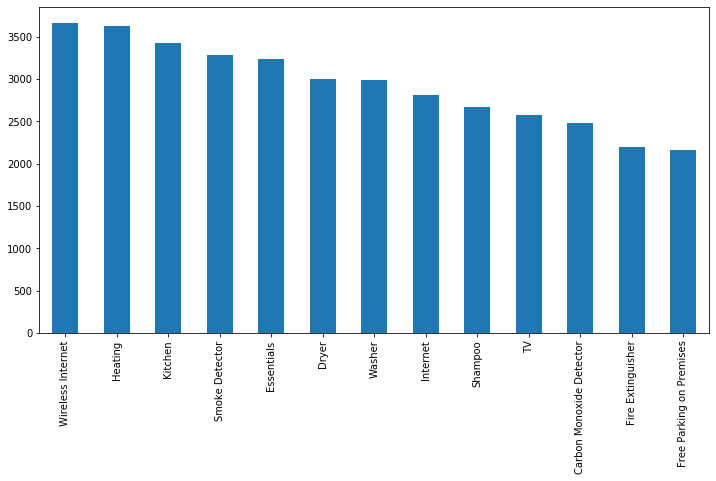

In [44]:
plt.figure(figsize = (12,6))
amenities.value_counts().head(13).plot(kind = 'bar')

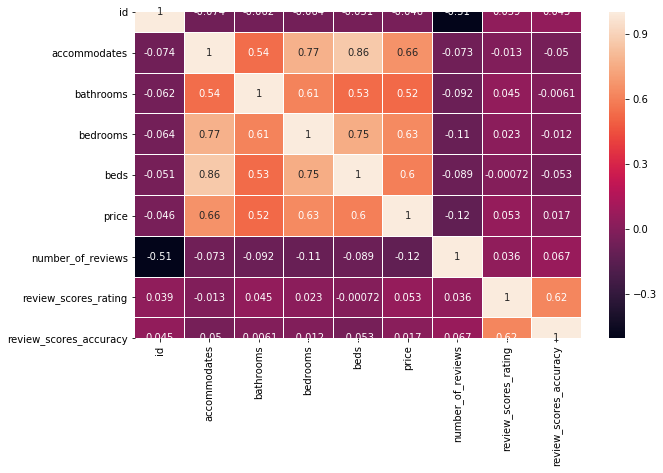

In [45]:
# check the correlation
plt.figure(figsize = (10,6))
sns.heatmap(listings.corr(),linewidths = 0.02, annot = True)

# Machine Learning

Additionally we are able to apply machine learning methods to see which features in dataset influence the price the most. In order to do this we will train model (__[Random Forest regressor](https://en.wikipedia.org/wiki/Random_forest)__) based on decision trees and look at resulting feature importances.

## Data preprocessing

In [46]:
listings.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy
0,241032,within a few hours,96%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,"[TV, Cable TV, Internet, Wireless Internet, Ai...",85.0,207,95.0,10.0
1,953595,within an hour,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,"[TV, Internet, Wireless Internet, Kitchen, Fre...",150.0,43,96.0,10.0
2,3308979,within a few hours,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,"[TV, Cable TV, Internet, Wireless Internet, Ai...",975.0,20,97.0,10.0
3,7421966,NaN,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,"[Internet, Wireless Internet, Kitchen, Indoor ...",100.0,0,NaN,NaN
4,278830,within an hour,100%,NaN,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,"[TV, Cable TV, Internet, Wireless Internet, Ki...",450.0,38,92.0,9.0


In [47]:
listing = listings.copy()

In [48]:
# drop columns
listing.drop(['id','amenities'], axis = 1, inplace = True)

In [49]:
listing.dtypes

host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
dtype: object

In [51]:
# missing values in each column
listing.isnull().sum()

host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
price                             0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
dtype: int64

In [57]:
# filling categorial missing value with mode and numeric missing value with median
listing['host_response_time'].fillna('within an hour',inplace = True)
listing['host_response_rate'].fillna('100%',inplace = True)
listing['host_acceptance_rate'].fillna('100%',inplace = True)
listing['host_is_superhost'].fillna('f',inplace = True)
listing['property_type'].fillna('House',inplace = True)
listing['bathrooms'].fillna(listing['bathrooms'].median(),inplace = True)
listing['bedrooms'].fillna(listing['bedrooms'].median(),inplace = True)
listing['beds'].fillna(listing['beds'].median(),inplace = True)
listing['review_scores_rating'].fillna(listing['review_scores_rating'].median(),inplace = True)
listing['review_scores_accuracy'].fillna(listing['review_scores_accuracy'].median(),inplace = True)

In [58]:
# check if missing value get filled or not
listing.isnull().sum()

host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
dtype: int64

In [64]:
# turn categorial columns into dummies
listing = pd.get_dummies(listing, columns = ['host_response_time','host_response_rate','host_acceptance_rate',
                                  'host_is_superhost','neighbourhood_group_cleansed','property_type','room_type'],
                                     drop_first = True)

## Model Training and Evaluation 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [65]:
X = listing.drop('price', axis = 1)
y = listing['price']

In [67]:
#split the data into training and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 10 )

### Train Random Forest Regressor model to predict price 

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
forest = RandomForestRegressor(n_estimators = 100)
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
y_pred = forest.predict(x_test)

In [78]:
print('Random Forest MSE on test set : ', metrics.mean_squared_error(y_test,y_pred))
print('Random Forest R^2 o test set : ', metrics.r2_score(y_test,y_pred))

Random Forest MSE on test set :  2871.413313515433
Random Forest R^2 o test set :  0.6342511664787682


In [97]:
# get feature importance from the model
values = zip(x_train.columns,forest.feature_importances_)
features = pd.DataFrame(values, columns = ['name','score']).sort_values(by = 'score', ascending = False)


Text(0, 0.5, 'score')

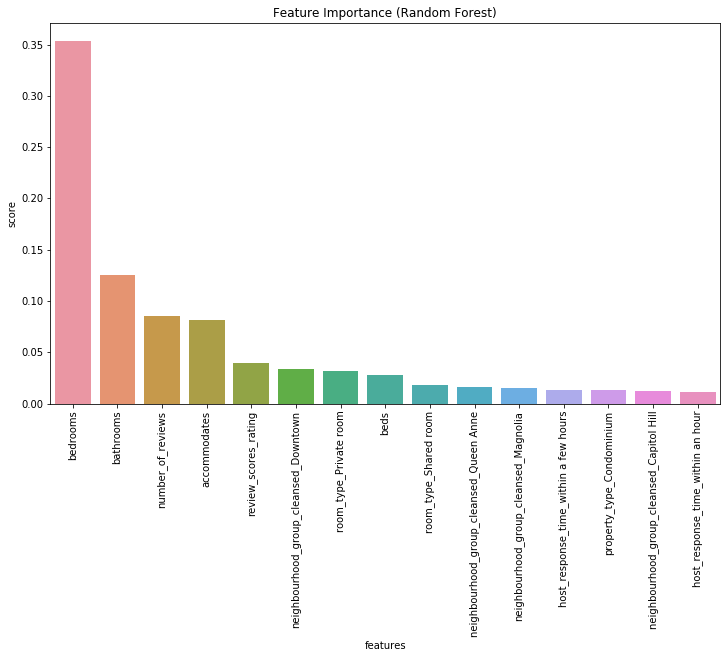

In [102]:
# plot features (only want to consider top 15 features).
imp_features = features.head(15)
plt.figure(figsize = (12,7))
plt.xticks(rotation = 90)
sns.barplot(x = 'name', y = 'score', data = imp_features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('features')
plt.ylabel('score')

Let's take a look at the results of the modelling:
* The modelling also shows us that factors already mentioned above have influence on price: neighbourhood,room type, number of bedrooms, bathrooms, beds and accomodates;
* The host qualities are important: time in which the host responds to the inquiries;
* The pricing also depend on reviews: number of reviews and review scores rating.

# Conclusion

The main takeaways of the Seattle data analysis include:
<br>Basic characteristics of the place (number of bedrooms, bathrooms, beds and accomodates) affect the reservation price.
<br> The reservation price varies depending on the time of the year. For example, the busiest time to visit Seattle is summer.
<br> The host qualities and the number of reviews and review scores rating also affect the reservation price.
<br>That is why if you want to save money, you may, for example, look for places which have fewer reviews. This will help to find the places with same characteristics (bathrooms, bedrooms, location etc.), and lower reservation price.